Group 5 - MAI391 - AI1804 - Project
Link tập dữ liệu
https://drive.google.com/drive/folders/1R-2Gxv9OiCYrgGvN2zf6EP4ZSDlhqcbD?usp=sharing

In [58]:
# Cài đặt thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import random
from PIL import Image
from sklearn import svm
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss, accuracy_score, confusion_matrix


In [3]:
# Đọc dữ liệu từ file csv
# Bạn có thể thay đổi địa chỉ tập dữ liệu đầu vào ở đây
train_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_train.csv',header=None)
test_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_test.csv',header=None)

In [6]:
# Thể hiện thông tin của dữ liệu
print("Traing data shape:",train_df.shape)
print("Test  data  shape:",test_df.shape)

#Till now we have loaded our train and test datasets. We have 60000 2d (28x28) images in our training dataset and 10000 in test dataset.
#columns of training data from 1 to 784 represents the pixel values and column 0 represents the corrosponding label, same goes for test data.

Traing data shape: (60000, 785)
Test  data  shape: (10000, 785)


In [5]:
# Kiểm tra dữ liệu có giá trị thiếu không
x = train_df.isnull().sum()>0
print("Số giá trị null trong tập train: ",x.sum())
x = test_df.isnull().sum()>0
print("Số giá trị null trong tập test: ",x.sum())

Số giá trị null trong tập train:  0
Số giá trị null trong tập test:  0


In [ ]:
train_df[0].value_counts(ascending=True).plot.bar(color='crimson');

In [8]:
x_train = train_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_train = x_train/255
y_train = train_df[0].values

x_test = test_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_test = x_test/255
y_test = test_df[0].values

Nhãn của dữ liệu ngẫu nhiên: 7


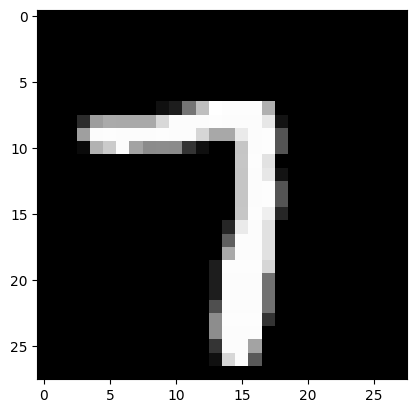

In [65]:
# Chọn ngẫu nhiên một chỉ số từ tập dữ liệu huấn luyện không pca
random_index = random.randint(0, len(x_train) - 1)
# In ra nhãn của dữ liệu ngẫu nhiên
print("Nhãn của dữ liệu ngẫu nhiên:", y_train[random_index])
# Hiển thị ảnh tương ứng với dữ liệu ngẫu nhiên
plt.imshow(x_train[random_index].reshape(28, 28), cmap='gray')
plt.show()

In [72]:
# Sử dụng PCA để giảm chiều dữ liệu
pca = PCA(n_components=0.95) # Lượng dữ liệu giữ lại
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(x_train_pca.shape[1],), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_pca, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3239 - accuracy: 0.9108
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1165 - accuracy: 0.9673
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9789
Epoch 4/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0540 - accuracy: 0.9854
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - accuracy: 0.9891
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9924
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - accuracy: 0.9961
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9974
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

In [79]:
# Thể hiện thông tin của dữ liệu đã qua PCA
print("Traing data shape:",x_train_pca.shape)
print("Test  data  shape:",x_test_pca.shape)

Traing data shape: (60000, 154)
Test  data  shape: (10000, 154)


In [73]:
# Tạo mô hình dựa trên dữ liệu không giảm chiều, sử dụng Keras

# Định nghĩa mô hình Neural Network
model1 = keras.Sequential([
    # Lớp đầu tiên: Fully connected layer với 128 đơn vị neuron và hàm kích hoạt ReLU
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    
    # Lớp đầu ra: Fully connected layer với 10 đơn vị neuron và hàm kích hoạt sigmoid
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile mô hình
model1.compile(optimizer='adam',              # Sử dụng thuật toán tối ưu hóa Adam
              loss='sparse_categorical_crossentropy',  # Hàm mất mát cho bài toán phân loại nhiều lớp
              metrics=['accuracy'])           # Đánh giá hiệu suất bằng accuracy

# Huấn luyện mô hình trên dữ liệu huấn luyện
model1.fit(x_train,                           # Dữ liệu đầu vào
          y_train,                           # Nhãn tương ứng
          epochs=15)                         # Số lượng epochs (lặp lại tập dữ liệu)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2591 - accuracy: 0.9262
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1125 - accuracy: 0.9665
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9765
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [74]:
# Tính toán độ chính xác trên tập kiểm thử và xuất nó dưới dạng phần trăm
model1.evaluate(x_test, y_test)[1]*100

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9803


98.03000092506409

In [75]:
# Tạo dự đoán
y_pred1 = model1.predict(x_test)

313/313 [==============================] - 1s 1ms/step


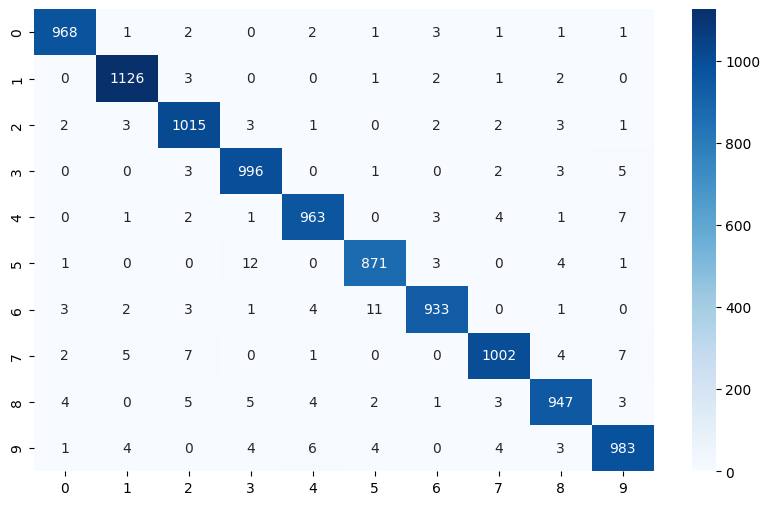

In [76]:
# Hiển thị ma trận nhầm lẫn bằng heatmap với dữ liệu chưa giảm chiều
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred1])
plt.figure(figsize=(10,6))
sns.heatmap(cf,annot=True,fmt='d',cmap='Blues');

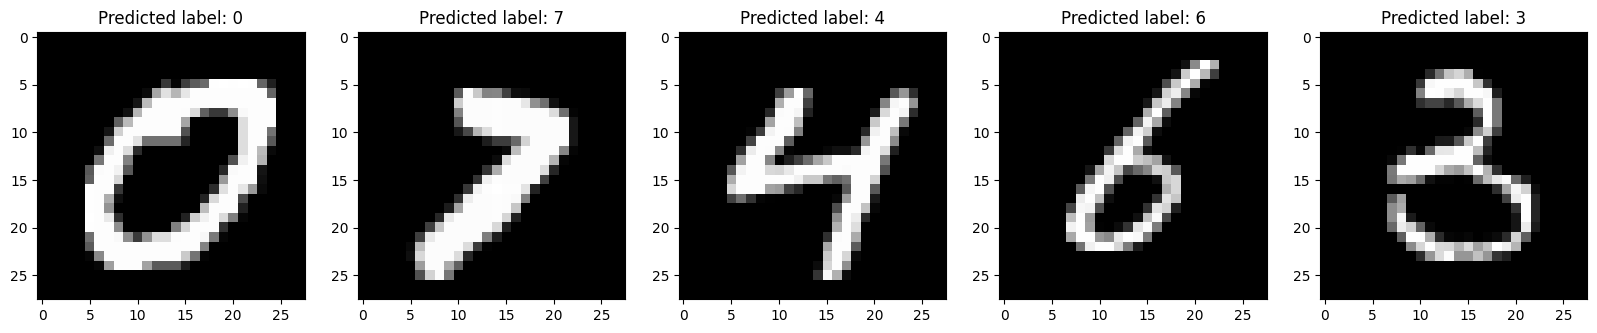

In [77]:
# Thử với một số hình ảnh random
# Chọn ngẫu nhiên 5 hình ảnh từ tập dữ liệu kiểm tra
random_indices = random.sample(range(len(x_test)), 5)

# Hiển thị hình ảnh và nhãn dự đoán tương ứng của chúng
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Hiển thị hình ảnh (reshape từ vectơ 1D thành ma trận 2D)
    plt.title('Predicted label: {}'.format(np.argmax(y_pred[idx])))  # Hiển thị nhãn dự đoán
plt.show()


In [80]:
# Tạo mô hình dựa trên dữ liệu đã giảm chiều, sử dụng Keras

# Định nghĩa mô hình Neural Network
model2 = keras.Sequential([
    # Lớp đầu tiên: Fully connected layer với 128 đơn vị neuron và hàm kích hoạt ReLU
    keras.layers.Dense(128, input_shape=(154,), activation='relu'),
    
    # Lớp đầu ra: Fully connected layer với 10 đơn vị neuron và hàm kích hoạt sigmoid
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile mô hình
model2.compile(optimizer='adam',              # Sử dụng thuật toán tối ưu hóa Adam
              loss='sparse_categorical_crossentropy',  # Hàm mất mát cho bài toán phân loại nhiều lớp
              metrics=['accuracy'])           # Đánh giá hiệu suất bằng accuracy

# Huấn luyện mô hình trên dữ liệu huấn luyện
model2.fit(x_train_pca,                           # Dữ liệu đầu vào
          y_train,                           # Nhãn tương ứng
          epochs=15)                         # Số lượng epochs (lặp lại tập dữ liệu)


Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3171 - accuracy: 0.9147
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9665
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9786
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9849
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0390 - accuracy: 0.9890
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9921
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0215 - accuracy: 0.9946
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9962
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0121 - accuracy: 0.9975
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.009

In [81]:
# Tính toán độ chính xác trên tập kiểm thử và xuất nó dưới dạng phần trăm
model2.evaluate(x_test_pca, y_test)[1]*100

313/313 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9784


97.83999919891357

In [82]:
# Tạo dự đoán
y_pred2 = model2.predict(x_test_pca)

313/313 [==============================] - 1s 1ms/step


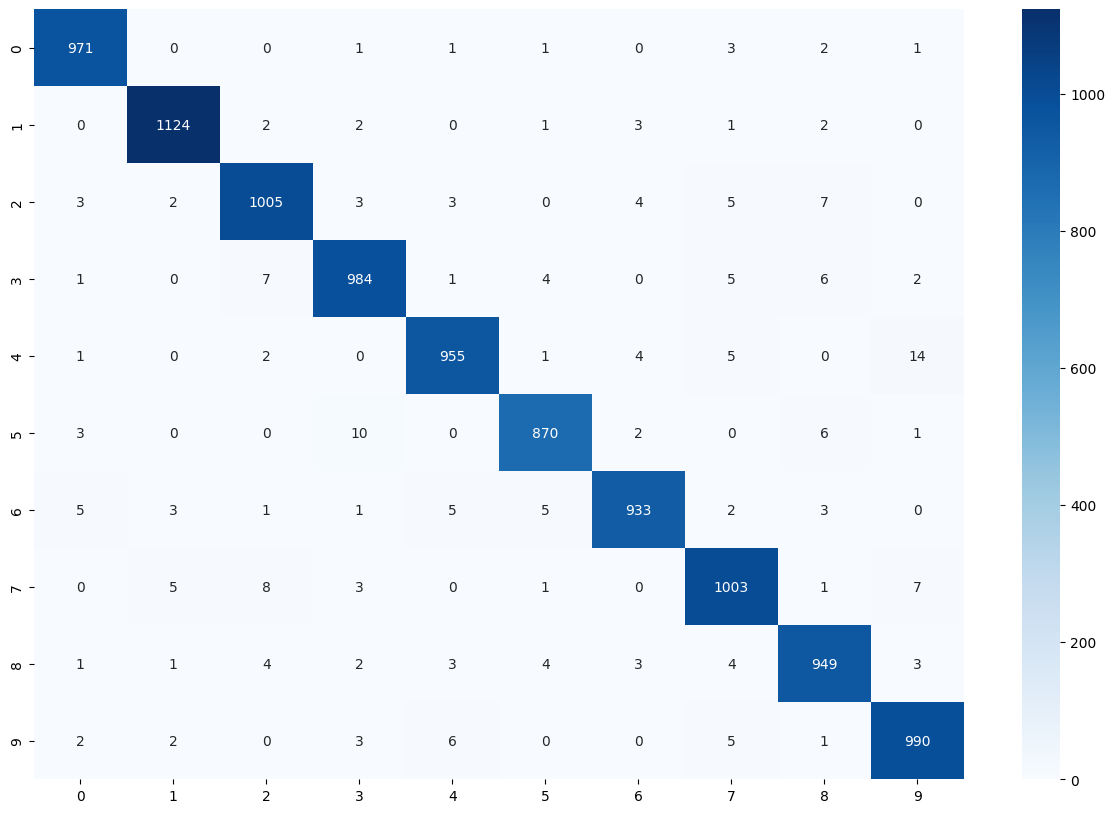

In [83]:
# Hiển thị ma trận nhầm lẫn bằng heatmap với dữ liệu đã
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred2])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='Blues');

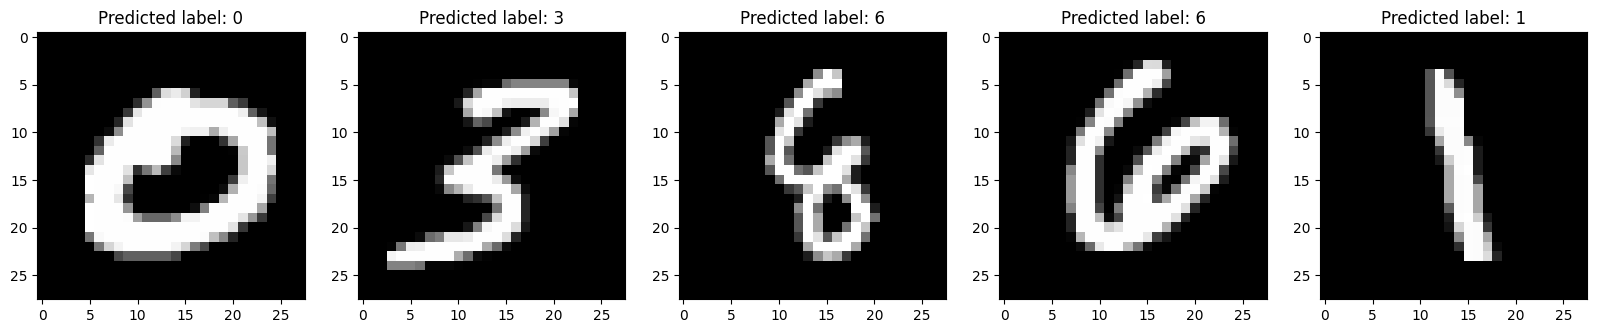

In [86]:
# Thử với một số hình ảnh random
# Chọn ngẫu nhiên 5 hình ảnh từ tập dữ liệu kiểm tra
random_indices = random.sample(range(len(x_test)), 5)

# Hiển thị hình ảnh và nhãn dự đoán tương ứng của chúng
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Hiển thị hình ảnh (reshape từ vectơ 1D thành ma trận 2D)
    plt.title('Predicted label: {}'.format(np.argmax(y_pred2[idx])))  # Hiển thị nhãn dự đoán
plt.show()

Tạo mô hình dựa vào SVM

In [97]:
# Tạo một bộ phân loại SVM
clf1 = svm.SVC(kernel='linear')

In [99]:
# Huấn luyện mô hình trên tập dữ liệu huấn luyện chưa qua PCA
clf1.fit(x_train, y_train)

SVC(kernel='linear')

In [100]:
# Dự đoán nhãn cho tập dữ liệu kiểm tra
y_pred1 = clf1.predict(x_test)

In [103]:
# Đánh giá hiệu suất của mô hình
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.9404


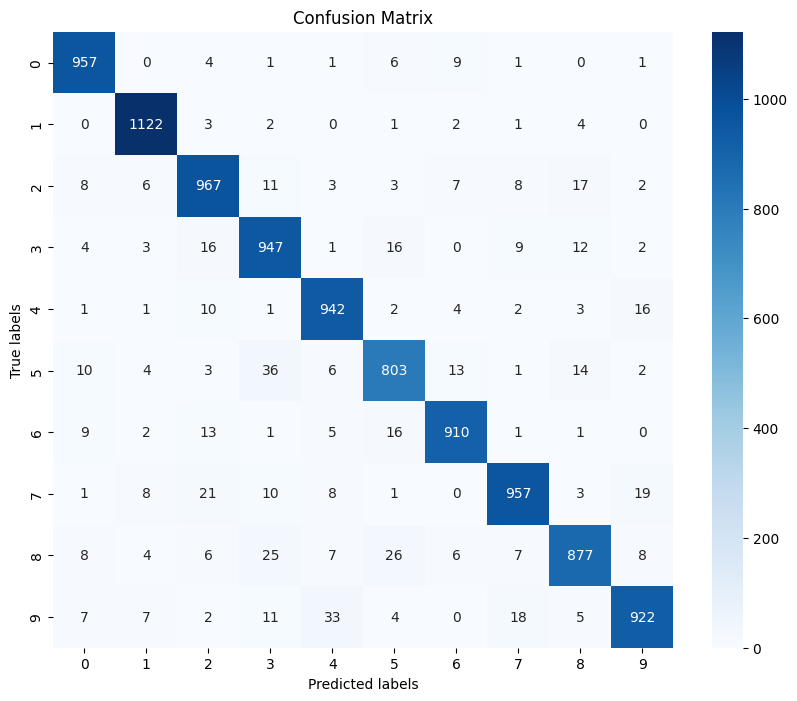

In [104]:
# Hiển thị ma trận confusion
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [105]:
# Tạo một bộ phân loại SVM
clf2 = svm.SVC(kernel='linear')

In [107]:
# Huấn luyện mô hình trên tập dữ liệu huấn luyện đã qua PCA
clf2.fit(x_train_pca, y_train)

SVC(kernel='linear')

In [108]:
# Dự đoán nhãn cho tập dữ liệu kiểm tra
y_pred2 = clf2.predict(x_test_pca)

In [109]:
# Đánh giá hiệu suất của mô hình
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.9448


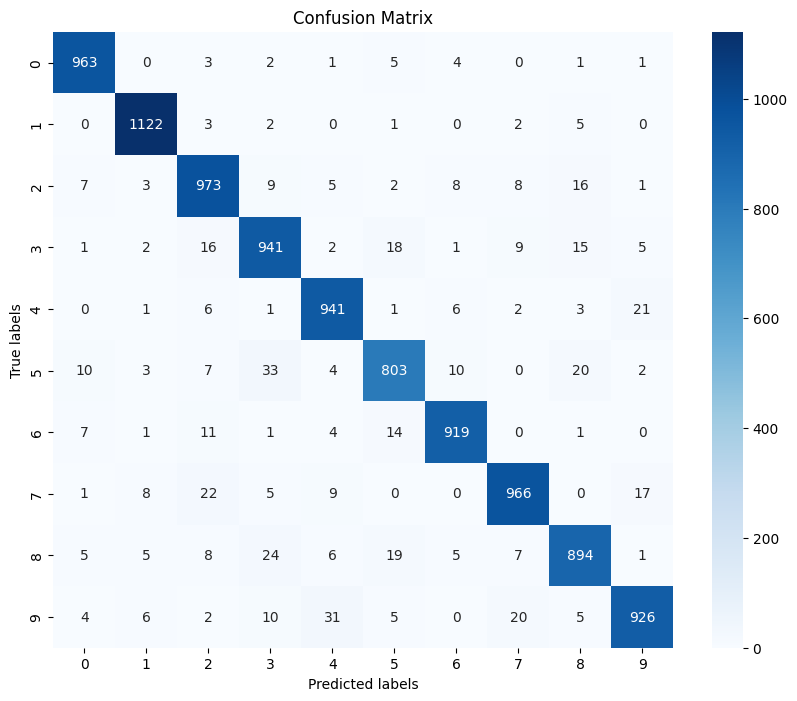

In [110]:
# Hiển thị ma trận confusion
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()